# Survey Symptoms

This notebooks visualizes the cognitive and health symptoms of the survey.

* _Input:_ Cleaned .csv from Qualtrics with cognitive and health symptoms questions
* _Output:_ Exports graphs as .jpg

**Tasks:** 
* Plots a bar chart with all cognitive symptoms
* Plots a bar chart with all health symptoms
* Plots a word cloud of 'other' open answers 

## Metadata

* **Master**: Master Information Studies: Information Systems (track)
* **University**: University of Amsterdam (UvA)
* **Institute**: Informatics Institute
* **Faculty**: Faculty of Science (FNWI)
* **Research Group**: Digital Interactions Lab (DIL)
* **Student**: BSc Danny de Vries (14495643)
* **Supervisor**: Dr. H. (Hamed) Seiied Alavi PhD

[Viszlab](https://www.viszlab.github.io) © 2024 by [Danny de Vries](https://wwww.github.com/dandevri) is licensed under [CC BY-NC-SA 4.0](http://creativecommons.org/licenses/by-nc-sa/4.0/?ref=chooser-v1).

## Prequisites

This notebooks needs a sufficient Python version (>=3.6) to run and requires some packages and libraries for analysis and visualization. The following code checks if your installed Python version is compatible, installs the necessary packages and imports the packages into the notebook.

### Check Python installation

In [1]:
from packaging import version
import platform
import sys

min_version = '3.8'

def check_version(min_version):
    current_version = sys.version.split()[0]
    return version.parse(current_version) >= version.parse(min_version)

# Example usage:
if __name__ == "__main__":
    if check_version(min_version):
        print("Running a sufficiently new version of Python.")
        print("Current version: " + platform.python_version())
        print("Minimum required version: " + min_version)
    else:
        print("Python version is too old. Upgrade to a newer version.")

Running a sufficiently new version of Python.
Current version: 3.9.12
Minimum required version: 3.8


### Install the required packages

In [2]:
!pip install pandas
!pip install seaborn
!pip install matplotlib
!pip install numpy
!pip install wordcloud

### Import the packages into the project

In [3]:
# External libraries 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud
import os

### Load the clean csv

In [4]:
def import_csv(file):
    df = pd.read_csv(file)
    return df

file = 'survey-data/survey_data_clean.csv'

full_data = import_csv(file)

## Analysis of symptons

### Health symptons

**Q:** _Do you experience any health related symptons based on the air quality in this space?_


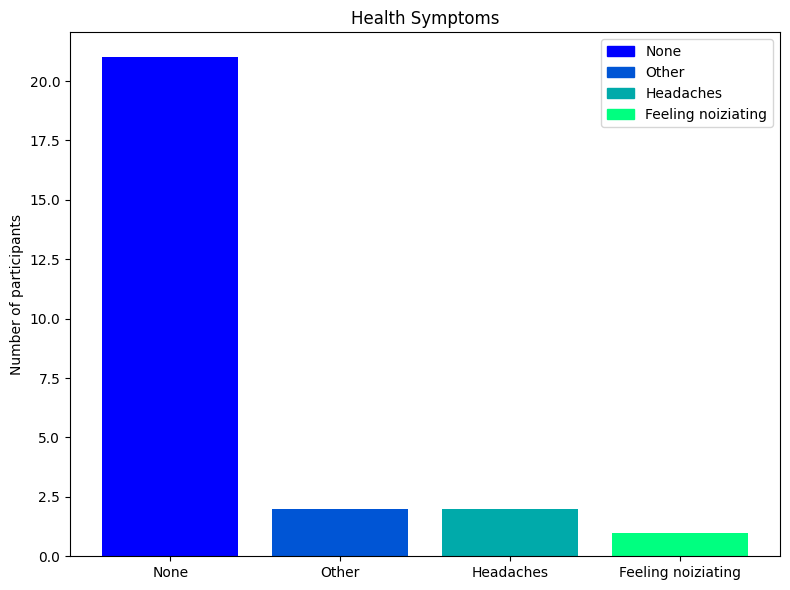

In [5]:
data = import_csv(file)

# Extract the 'Cognitive' column
health_symptoms = data['Symptons']

# Count the occurrences of each symptom
symptom_counts = health_symptoms.value_counts()

# Define a color map
cmap = plt.get_cmap('winter')

# Plot the bar chart with the specified colormap
plt.figure(figsize=(8, 6))
bars = plt.bar(symptom_counts.index, symptom_counts.values, color=cmap(np.linspace(0, 1, len(symptom_counts))))

plt.title('Health Symptoms')
plt.ylabel('Number of participants')

# Create legend handles with colors corresponding to the colormap
legend_handles = []
for label, color in zip(symptom_counts.index, cmap(np.linspace(0, 1, len(symptom_counts)))):
    legend_handles.append(plt.Rectangle((0,0),1,1, color=color))

# Add legend with specified labels and handles
plt.legend(legend_handles, symptom_counts.index)

plt.tight_layout()  # Adjust layout to prevent clipping of labels

# Save the chart to the 'charts' subfolder
plt.savefig(os.path.join('survey-charts', 'health_symptomps.png'))

plt.show()

_Create a word cloud of the 'other' responses_

In [6]:
# Extract the 'Symptons_5_TEXT' column into a new DataFrame
symptoms_text_df = data[['Symptons_5_TEXT']]

# Display the new DataFrame
print(symptoms_text_df)

                                    Symptons_5_TEXT
0                                               NaN
1                                               NaN
2                                       foggy brain
3                                               NaN
4                                               NaN
5                                               NaN
6                                               NaN
7                                               NaN
8                                               NaN
9                                               NaN
10                                              NaN
11                                              NaN
12                                              NaN
13                                              NaN
14                                              NaN
15                                              NaN
16                                              NaN
17                                              NaN
18          

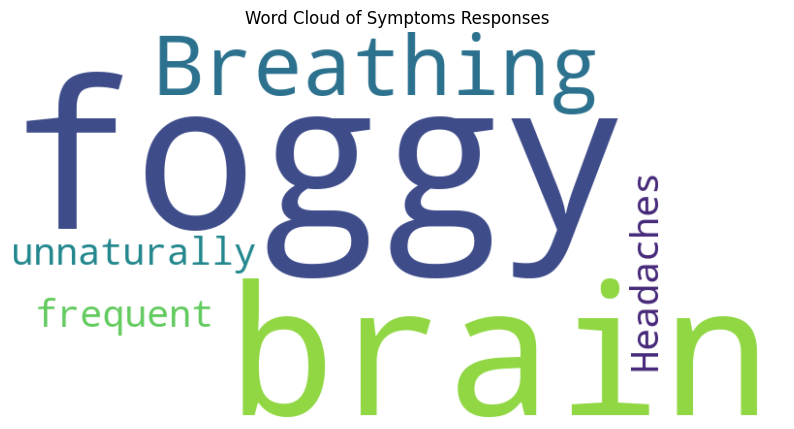

In [7]:
# Extract responses from the 'Symptons_5_TEXT' column
symptoms_text = data['Symptons_5_TEXT'].dropna()  # Remove NaN values

# Join all responses into a single string
all_text = ' '.join(symptoms_text)

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Plot the WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Symptoms Responses')
plt.axis('off')  # Turn off axis
plt.show()

### Cognitive symptons

**Q:** _Do you experience any cognitive based symptons on the air quality in this space?_

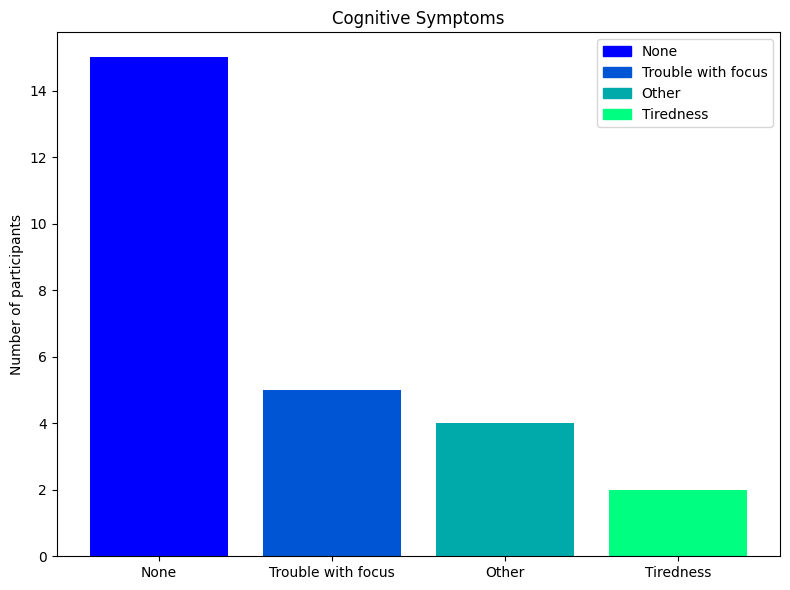

In [8]:
data = import_csv(file)

# Extract the 'Cognitive' column
cognitive_symptoms = data['Cognitive']

# Count the occurrences of each symptom
symptom_counts = cognitive_symptoms.value_counts()

# Define a color map
cmap = plt.get_cmap('winter')

# Plot the bar chart with the specified colormap
plt.figure(figsize=(8, 6))
bars = plt.bar(symptom_counts.index, symptom_counts.values, color=cmap(np.linspace(0, 1, len(symptom_counts))))

plt.title('Cognitive Symptoms')
plt.ylabel('Number of participants')

# Create legend handles with colors corresponding to the colormap
legend_handles = []
for label, color in zip(symptom_counts.index, cmap(np.linspace(0, 1, len(symptom_counts)))):
    legend_handles.append(plt.Rectangle((0,0),1,1, color=color))

# Add legend with specified labels and handles
plt.legend(legend_handles, symptom_counts.index)

plt.tight_layout()  # Adjust layout to prevent clipping of labels

# Save the chart to the 'charts' subfolder
plt.savefig(os.path.join('survey-charts', 'cognitive_symptomps.png'))

plt.show()

_Create a world cloud of the 'other' responses_

In [9]:
symptoms_text_df = data[['Cognitive_3_TEXT']]
print(symptoms_text_df)

                                     Cognitive_3_TEXT
0                                                 NaN
1                                                 NaN
2                                                 NaN
3                                                 NaN
4                                                 NaN
5                                                 NaN
6                                                 NaN
7                                                 NaN
8                                                 NaN
9                         I feel sick bcs of the cold
10                                                NaN
11                                                NaN
12                                                NaN
13                                                NaN
14                                                NaN
15                                                NaN
16                                                NaN
17                          

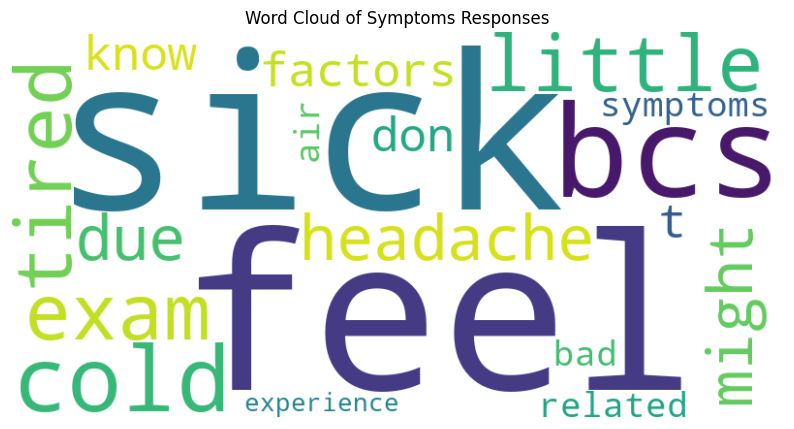

In [10]:
# Extract responses from the 'Cognitive_3_TEXT' column
symptoms_text = data['Cognitive_3_TEXT'].dropna()  # Remove NaN values

# Join all responses into a single string
all_text = ' '.join(symptoms_text)

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Plot the WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Symptoms Responses')
plt.axis('off')  # Turn off axis
plt.show()